<a href="https://colab.research.google.com/github/heeyoung00/Most-Streamed-Songs_analysis/blob/main/%EB%85%B8%EB%9E%98%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import calendar
from pathlib import Path
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt
from pandas.plotting import parallel_coordinates
import statsmodels.api as sm
from collections import Counter


from google.colab import files
uploaded = files.upload()
# 데이터 확인
print(df.head())  # 데이터 상위 5개 행 확인
print(df.info())  # 데이터 타입 및 결측치 확인
print(df.describe())  # 데이터 통계 요약


Saving 전처리 데이터.csv to 전처리 데이터 (2).csv
   artist_count  released_year  released_month  released_day  \
0             1           2023               3            23   
1             1           2023               5            18   
2             1           2023               7             7   
3             2           2023               3            17   
4             1           2023               4            14   

   in_spotify_charts  in_apple_charts  in_deezer_charts       bpm       key  \
0           0.680272         0.365482          0.775862  0.200000  0.000000   
1           0.666667         0.329949          0.758621  0.585185  0.833333   
2           0.714286         0.553299          0.793103  0.259259  0.500000   
3           0.707483         0.446701          0.793103  0.777778  0.166667   
4           0.340136         0.213198          0.603448  0.481481  0.166667   

   mode  danceability_%  valence_%  energy_%  acousticness_%  chart_score  \
0     1        0.647887  

# 데이터 준비 및 시즌별 분석
 시즌별 데이터 분리

In [ ]:
# 데이터 전처리
seasons = ['spring', 'summer', 'autumn', 'winter']

# 시즌별 데이터 프레임 생성
season_data = {season: df[df['season'] == season] for season in seasons}

# 독립변수 및 종속변수 선택
independent_vars = ['artist_count', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%']
dependent_var = 'chart_score'

# 시즌별 X, y 설정
season_splits = {season: (data[independent_vars], data[dependent_var]) for season, data in season_data.items()}


# 랜덤 포레스트 분석 및 시각화
  (1) 랜덤 포레스트 모델 생성 및 학습

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 시즌별 모델 학습 및 평가
rf_results = {}
for season, (X, y) in season_splits.items():
    # 데이터 분리
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 랜덤 포레스트 모델 학습
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # 예측
    y_pred = rf_model.predict(X_test)

    # 성능 평가
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rf_results[season] = {'model': rf_model, 'mse': mse, 'r2': r2, 'X_test': X_test, 'y_test': y_test, 'y_pred': y_pred}

    print(f"{season.capitalize()} - MSE: {mse:.2f}, R²: {r2:.2f}")


Spring - MSE: 0.04, R²: 0.11
Summer - MSE: 0.06, R²: -0.16
Autumn - MSE: 0.04, R²: -0.29
Winter - MSE: 0.04, R²: -0.02


 (2) 시즌별 실제값 vs 예측값 시각화

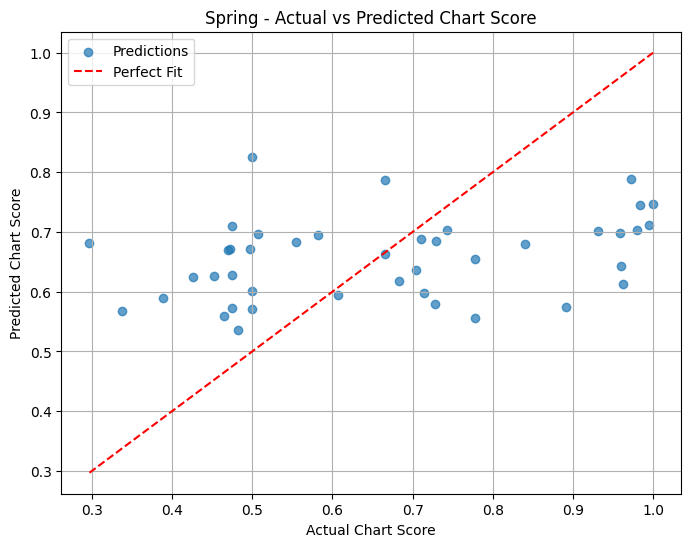

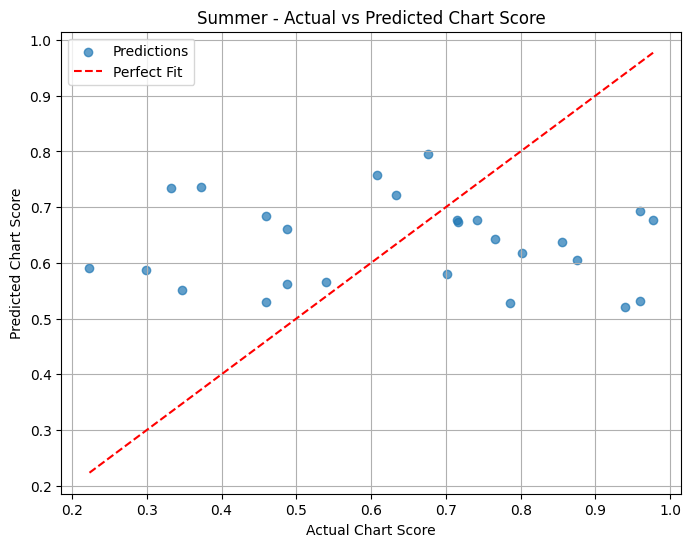

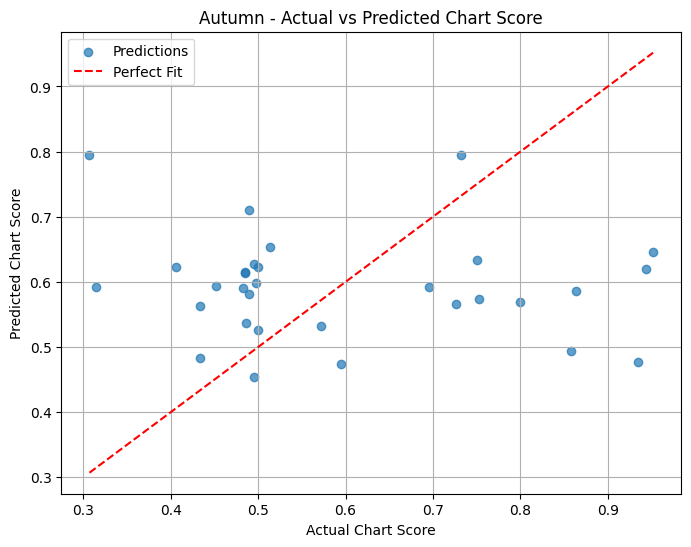

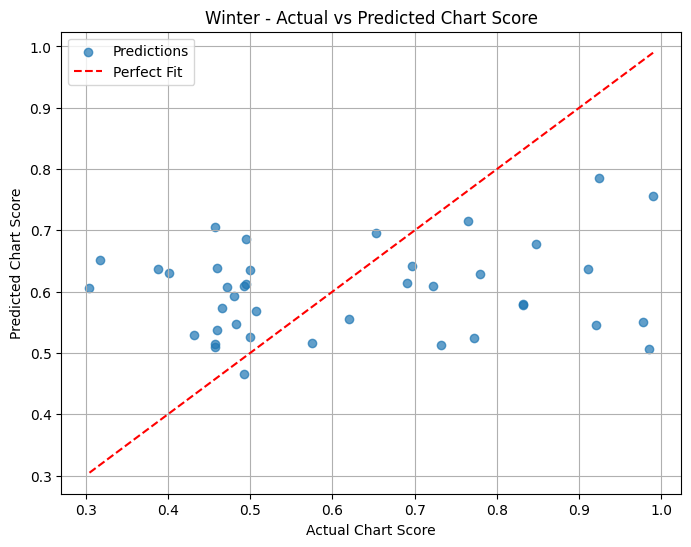

In [ ]:
# 시각화
for season, result in rf_results.items():
    plt.figure(figsize=(8, 6))
    plt.scatter(result['y_test'], result['y_pred'], alpha=0.7, label='Predictions')
    plt.plot([result['y_test'].min(), result['y_test'].max()], [result['y_test'].min(), result['y_test'].max()], '--', color='red', label='Perfect Fit')
    plt.title(f"{season.capitalize()} - Actual vs Predicted Chart Score")
    plt.xlabel("Actual Chart Score")
    plt.ylabel("Predicted Chart Score")
    plt.legend()
    plt.grid()
    plt.show()


(3) 변수 중요도 시각화

<ipython-input-19-1bef24c56d08>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_names, palette='viridis')


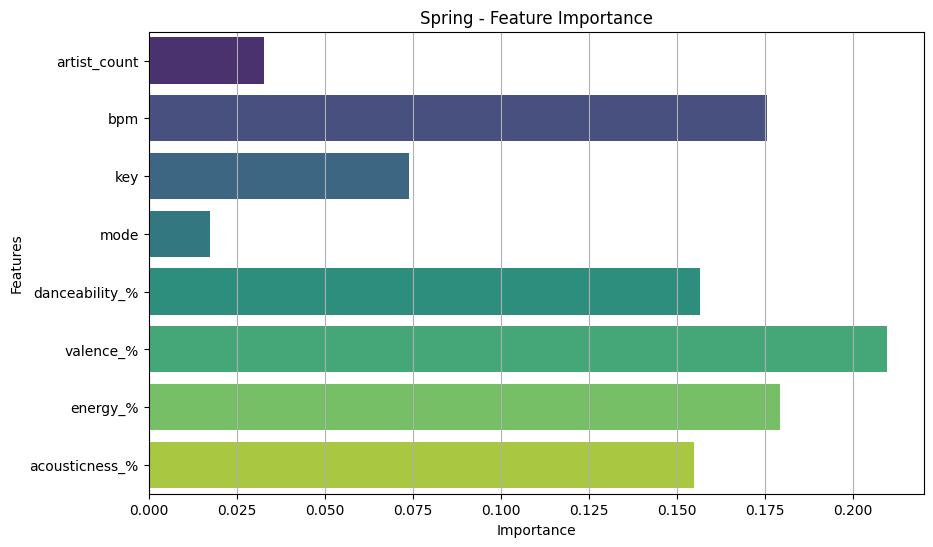

<ipython-input-19-1bef24c56d08>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_names, palette='viridis')


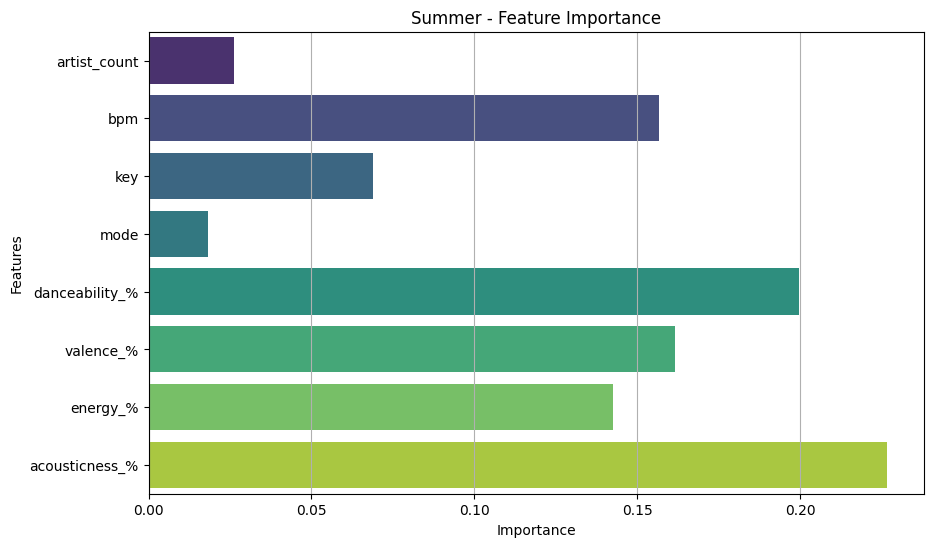

<ipython-input-19-1bef24c56d08>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_names, palette='viridis')


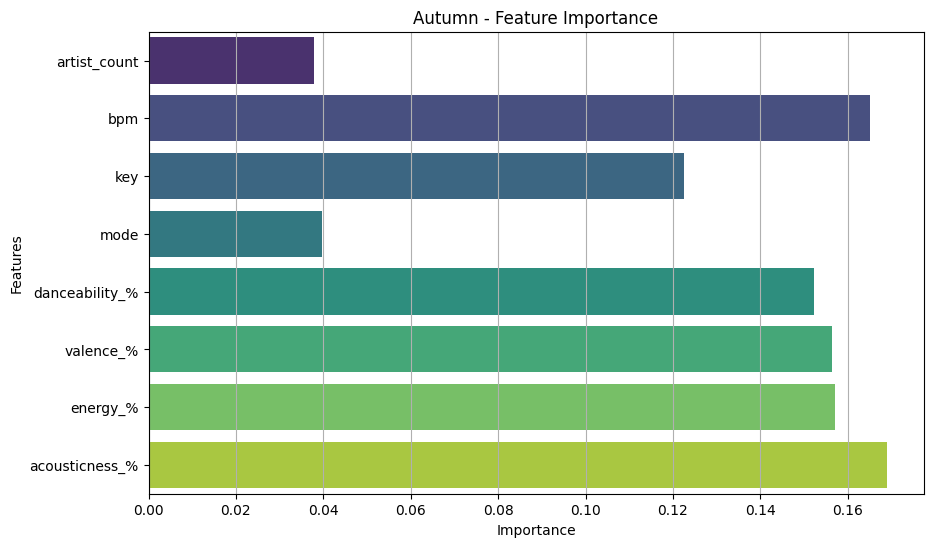

<ipython-input-19-1bef24c56d08>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_names, palette='viridis')


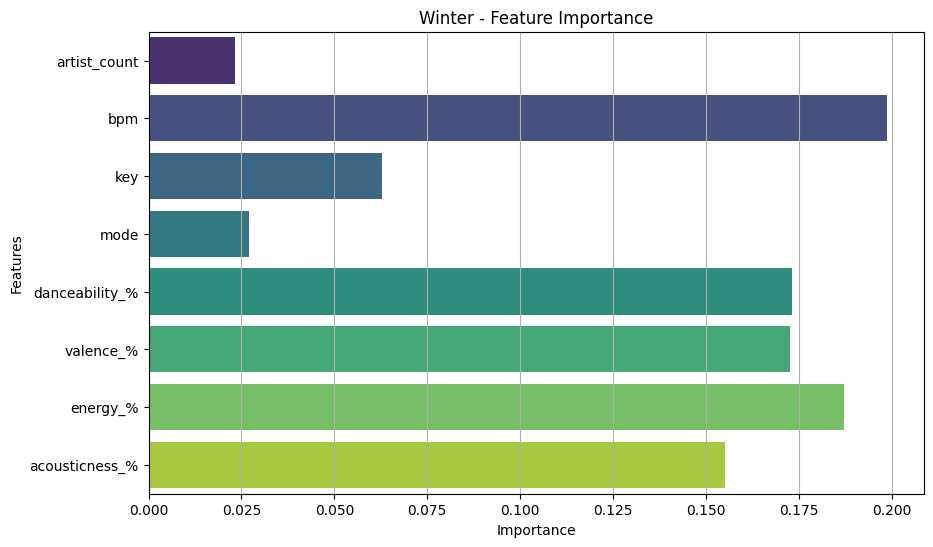

In [ ]:
# 변수 중요도 시각화
for season, result in rf_results.items():
    feature_importances = result['model'].feature_importances_
    feature_names = X.columns

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances, y=feature_names, palette='viridis')
    plt.title(f"{season.capitalize()} - Feature Importance")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.grid(axis='x')
    plt.show()


# 다항 회귀 분석
(1) 다항 특성 생성 및 모델 학습

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 시즌별 다항 회귀 분석
degree = 2
poly_results = {}

for season, (X, y) in season_splits.items():
    # 다항 특성 생성
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)

    # 데이터 분리
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

    # 다항 회귀 모델 학습
    poly_model = LinearRegression()
    poly_model.fit(X_train, y_train)

    # 예측
    y_pred = poly_model.predict(X_test)

    # 성능 평가
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    poly_results[season] = {'model': poly_model, 'mse': mse, 'r2': r2}

    print(f"{season.capitalize()} - Polynomial Regression - MSE: {mse:.2f}, R²: {r2:.2f}")


Spring - Polynomial Regression - MSE: 0.09, R²: -1.03
Summer - Polynomial Regression - MSE: 0.08, R²: -0.70
Autumn - Polynomial Regression - MSE: 0.10, R²: -2.06
Winter - Polynomial Regression - MSE: 0.04, R²: -0.12


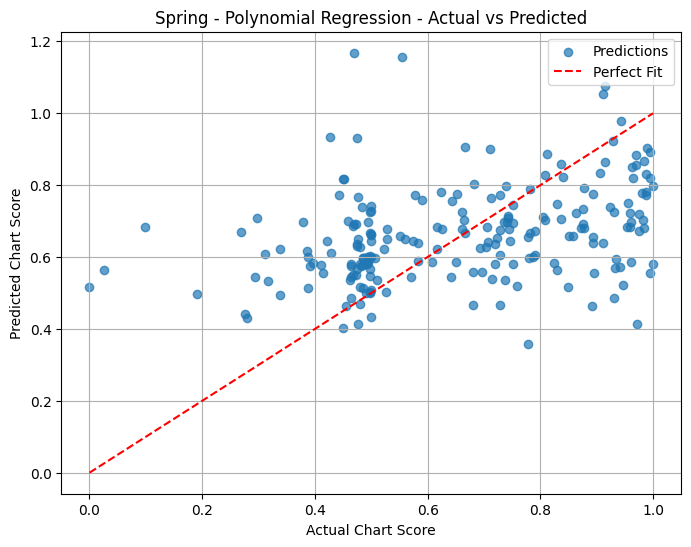

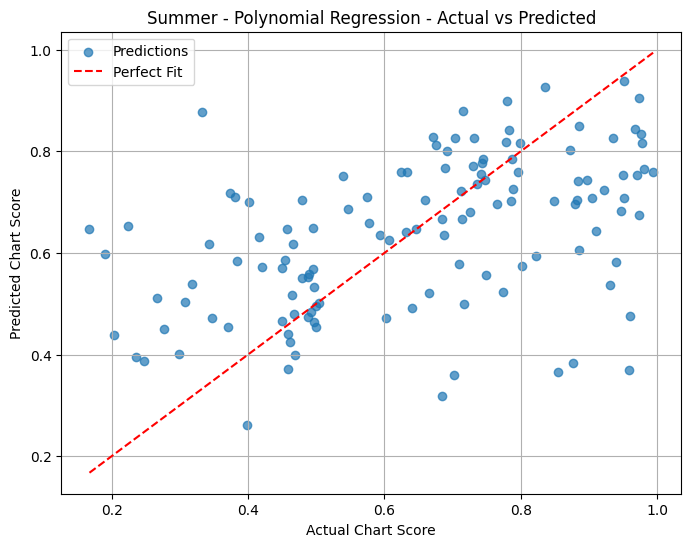

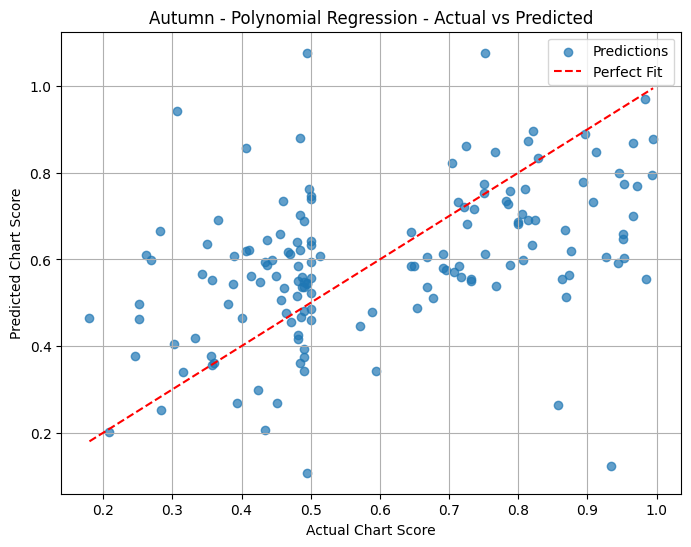

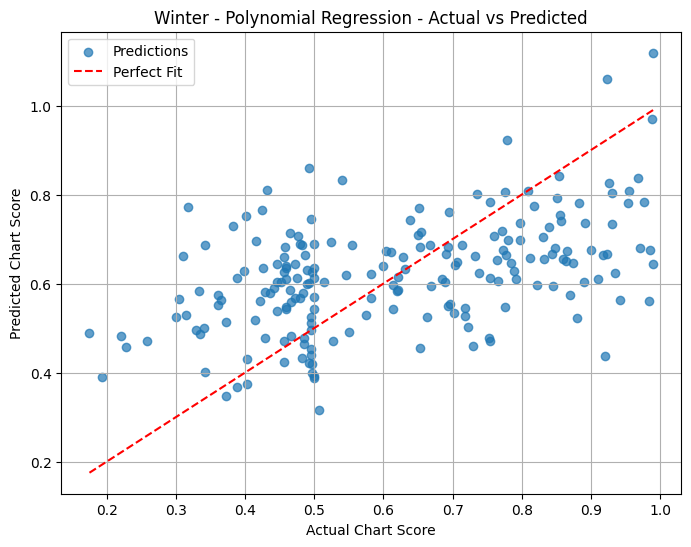

In [ ]:
# 다항 회귀 시각화 (예측값 vs 실제값)
for season, result in poly_results.items():
    # Accessing the model, X_test, and y_test from the season_splits dictionary
    X_test_season, y_test_season = season_splits[season]

    # 다항 특성 생성 (테스트 데이터에 대해서도 동일하게 적용)
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_test_poly = poly.fit_transform(X_test_season)

    # 모델을 사용하여 예측 수행
    y_pred_season = result['model'].predict(X_test_poly)

    plt.figure(figsize=(8, 6))
    # Using y_test_season and y_pred_season for plotting
    plt.scatter(y_test_season, y_pred_season, alpha=0.7, label='Predictions')
    plt.plot([y_test_season.min(), y_test_season.max()], [y_test_season.min(), y_test_season.max()], '--', color='red', label='Perfect Fit')
    plt.title(f"{season.capitalize()} - Polynomial Regression - Actual vs Predicted")
    plt.xlabel("Actual Chart Score")
    plt.ylabel("Predicted Chart Score")
    plt.legend()
    plt.grid()
    plt.show()

# Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# 시즌별 Gradient Boosting 분석
gbr_results = {}

for season, (X, y) in season_splits.items():
    # 데이터 분리
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Gradient Boosting 모델 학습
    gbr_model = GradientBoostingRegressor(random_state=42)
    gbr_model.fit(X_train, y_train)

    # 예측
    y_pred = gbr_model.predict(X_test)

    # 성능 평가
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    gbr_results[season] = {'model': gbr_model, 'mse': mse, 'r2': r2}

    print(f"{season.capitalize()} - Gradient Boosting - MSE: {mse:.2f}, R²: {r2:.2f}")


Spring - Gradient Boosting - MSE: 0.05, R²: -0.07
Summer - Gradient Boosting - MSE: 0.05, R²: -0.10
Autumn - Gradient Boosting - MSE: 0.06, R²: -0.83
Winter - Gradient Boosting - MSE: 0.04, R²: -0.01


# 1. 실제값 vs 예측값 시각화

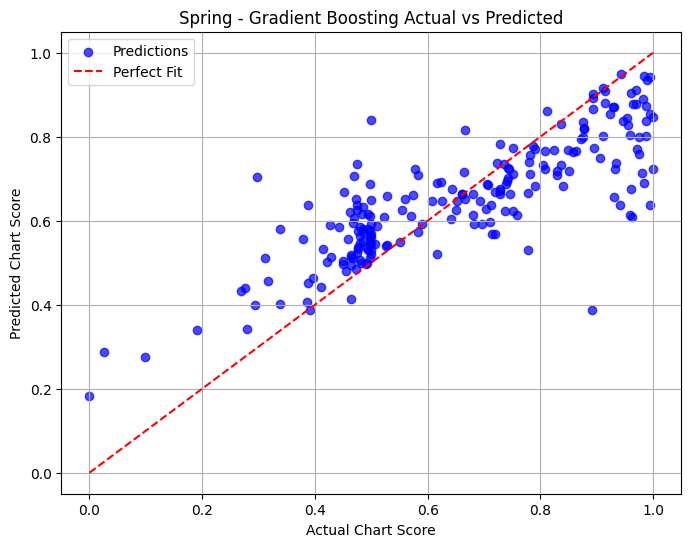

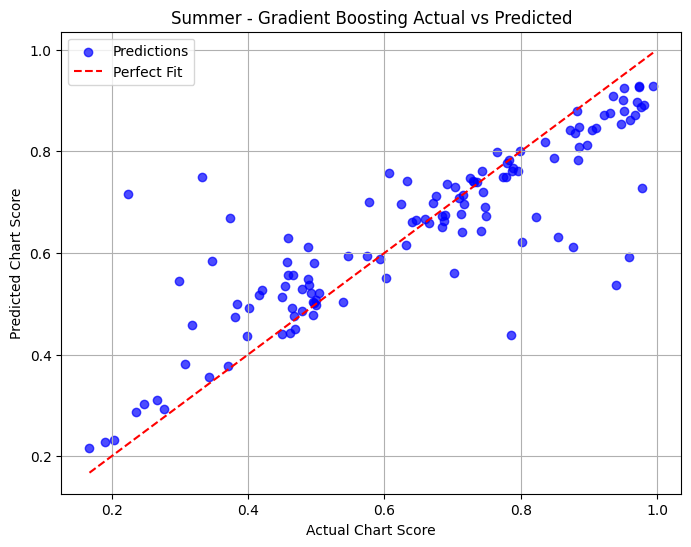

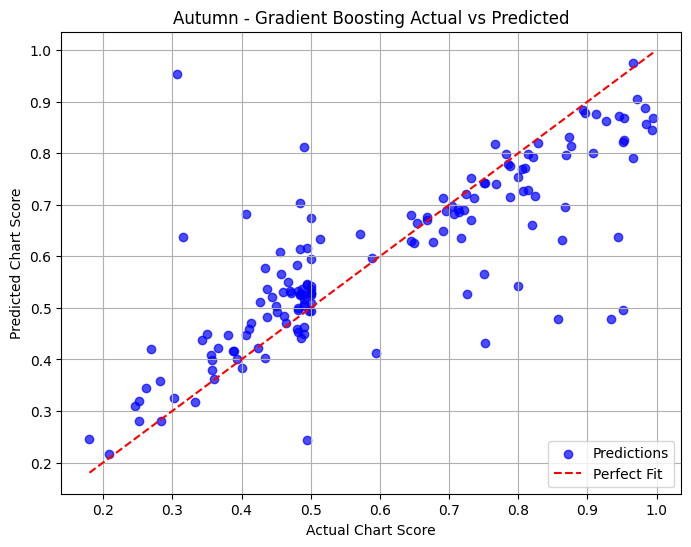

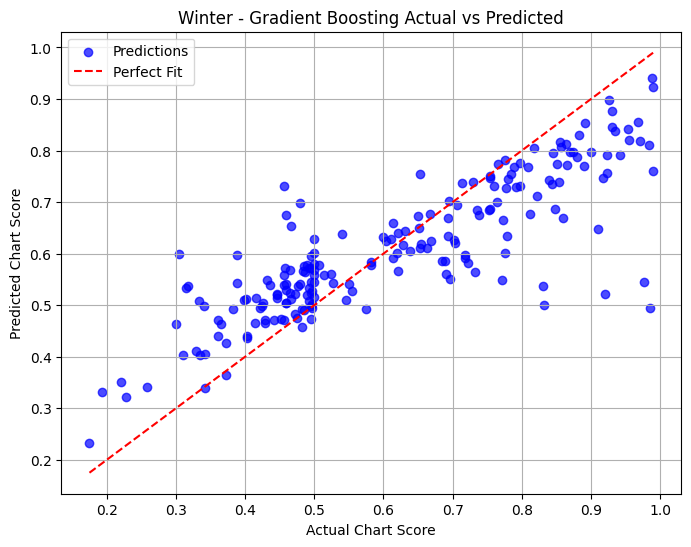

In [ ]:
import matplotlib.pyplot as plt

# 시즌별 실제값 vs 예측값 시각화
for season, result in gbr_results.items():
    plt.figure(figsize=(8, 6))
    # Accessing the model, X_test, and y_test from the season_splits dictionary
    X_test_season, y_test_season = season_splits[season]

    # 다항 특성 생성 (테스트 데이터에 대해서도 동일하게 적용)
    #X_test_poly = poly.fit_transform(X_test_season)  # No need for polynomial features for Gradient Boosting

    # 모델을 사용하여 예측 수행
    y_pred_season = result['model'].predict(X_test_season)

    # y_test_season and y_pred_season for plotting
    plt.scatter(y_test_season, y_pred_season, alpha=0.7, color='blue', label='Predictions')
    plt.plot([y_test_season.min(), y_test_season.max()], [y_test_season.min(), y_test_season.max()], '--', color='red', label='Perfect Fit')
    plt.title(f"{season.capitalize()} - Gradient Boosting Actual vs Predicted")
    plt.xlabel("Actual Chart Score")
    plt.ylabel("Predicted Chart Score")
    plt.legend()
    plt.grid()
    plt.show()

# 2. 잔차 분석 시각화
  잔차(Residual = Actual - Predicted)를 시각화하여 모델의 오차 패턴을 확인

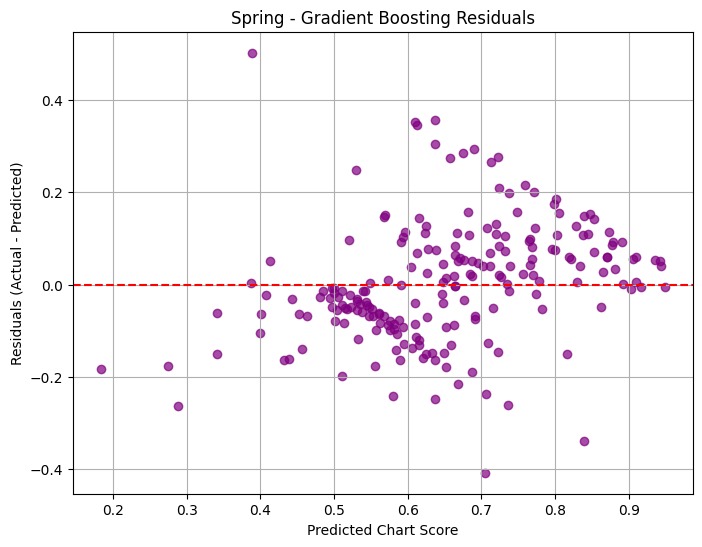

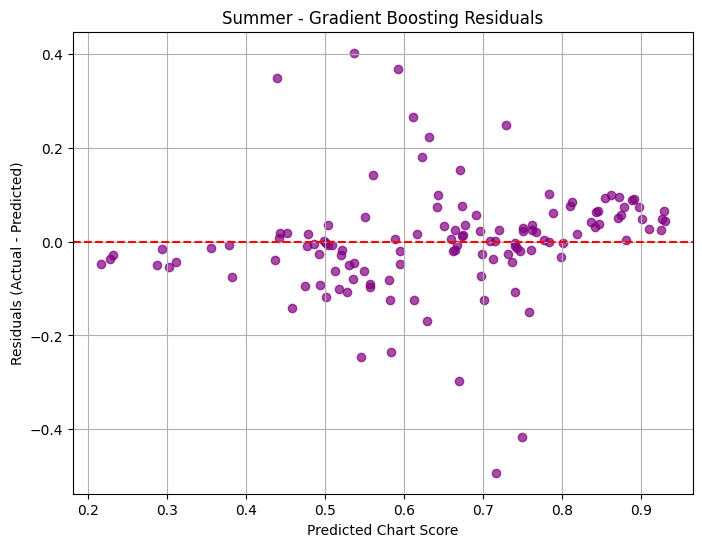

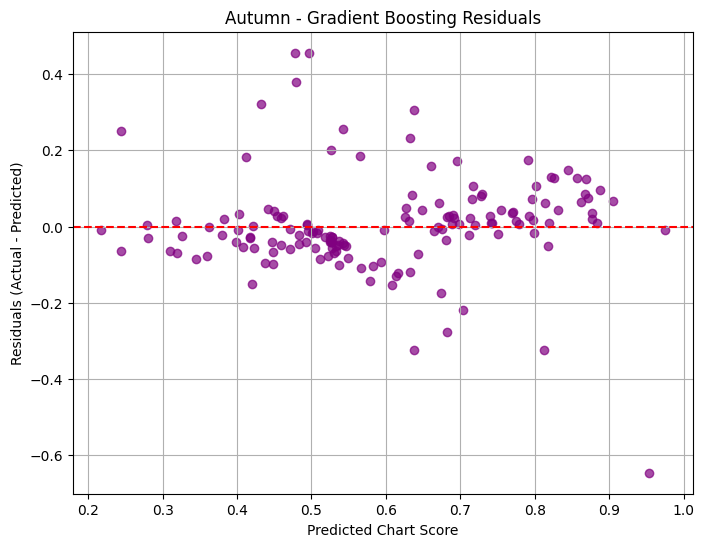

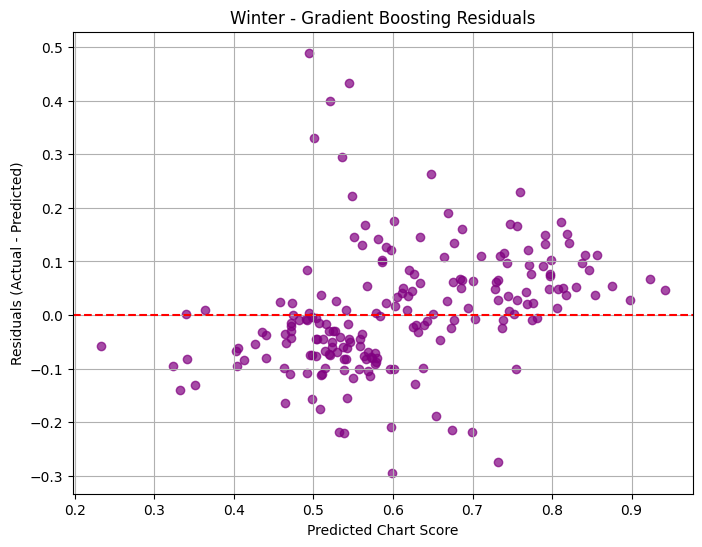

In [ ]:
# 시즌별 잔차 분석 시각화
for season, result in gbr_results.items():
    plt.figure(figsize=(8, 6))

    # Accessing the X_test and y_test from season_splits
    X_test_season, y_test_season = season_splits[season]

    # Predicting using the saved model for the season
    y_pred_season = result['model'].predict(X_test_season)

    # Calculating residuals
    residuals = y_test_season - y_pred_season

    plt.scatter(y_pred_season, residuals, alpha=0.7, color='purple')
    plt.axhline(0, color='red', linestyle='--')  # 잔차의 기준선
    plt.title(f"{season.capitalize()} - Gradient Boosting Residuals")
    plt.xlabel("Predicted Chart Score")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.grid()
    plt.show()

# 3. 변수 중요도 시각화
Gradient Boosting 모델에서 추출한 변수 중요도를 바 플롯으로 시각화

<ipython-input-30-df1fd9cebed2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_names, palette='viridis')


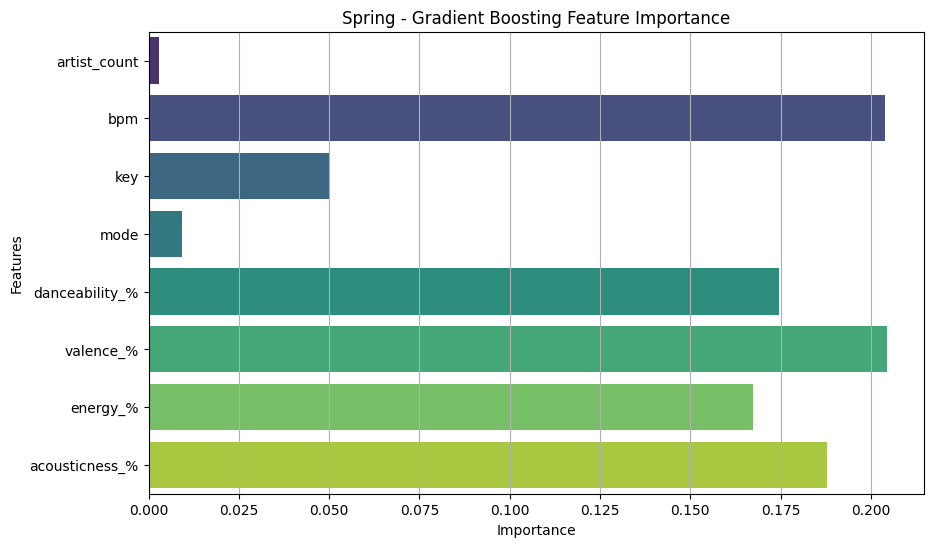

<ipython-input-30-df1fd9cebed2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_names, palette='viridis')


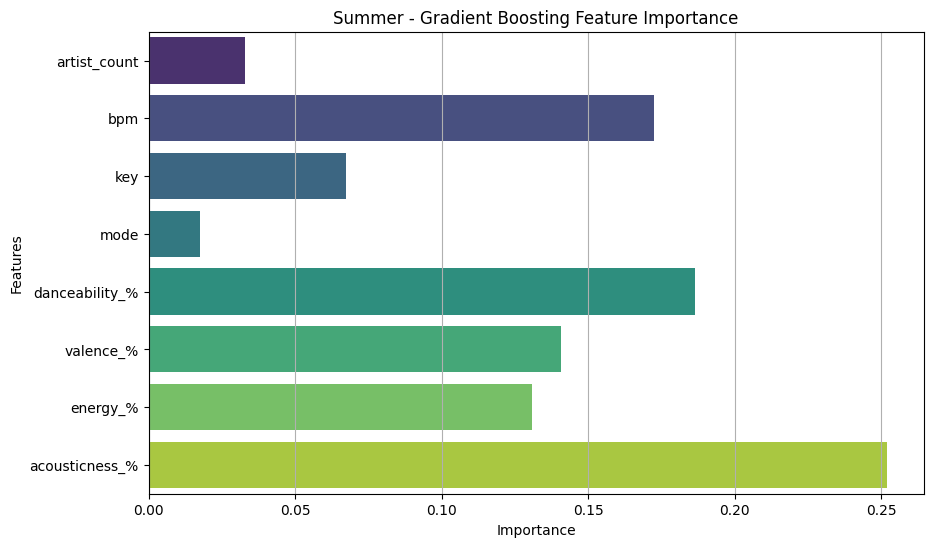

<ipython-input-30-df1fd9cebed2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_names, palette='viridis')


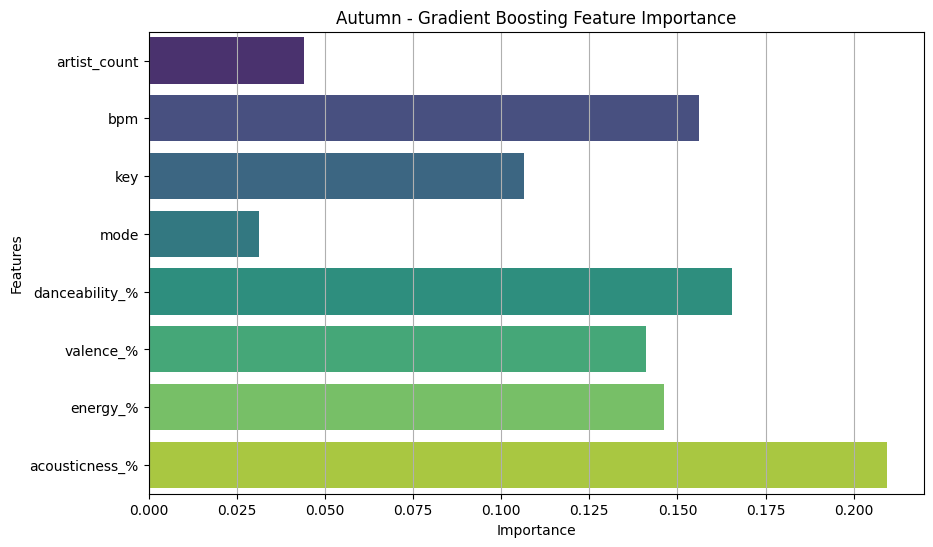

<ipython-input-30-df1fd9cebed2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_names, palette='viridis')


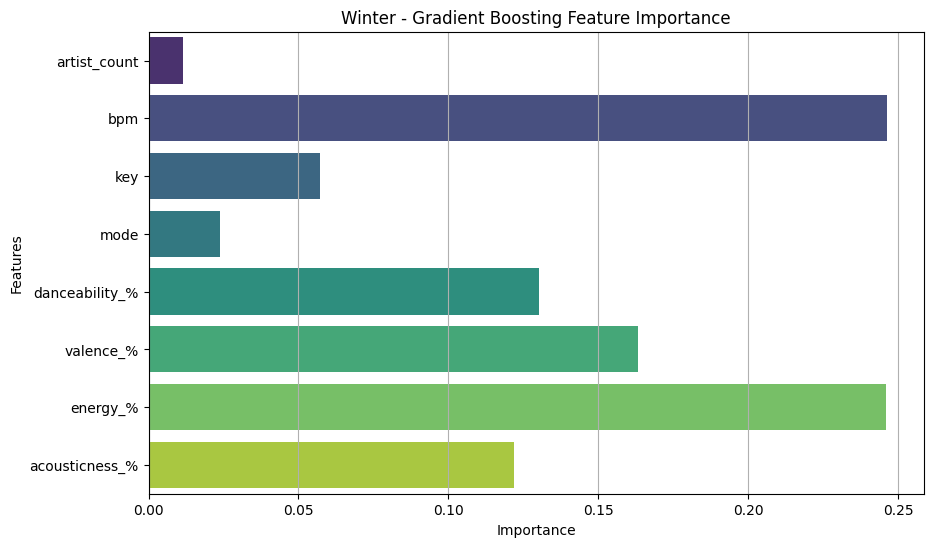

In [ ]:
import seaborn as sns

# 시즌별 변수 중요도 시각화
for season, result in gbr_results.items():
    feature_importances = result['model'].feature_importances_
    feature_names = X.columns

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances, y=feature_names, palette='viridis')
    plt.title(f"{season.capitalize()} - Gradient Boosting Feature Importance")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.grid(axis='x')
    plt.show()


# 4. 성능 비교 시각화

<ipython-input-31-ce56c766b4fb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasons, y=mse_scores, palette='coolwarm')


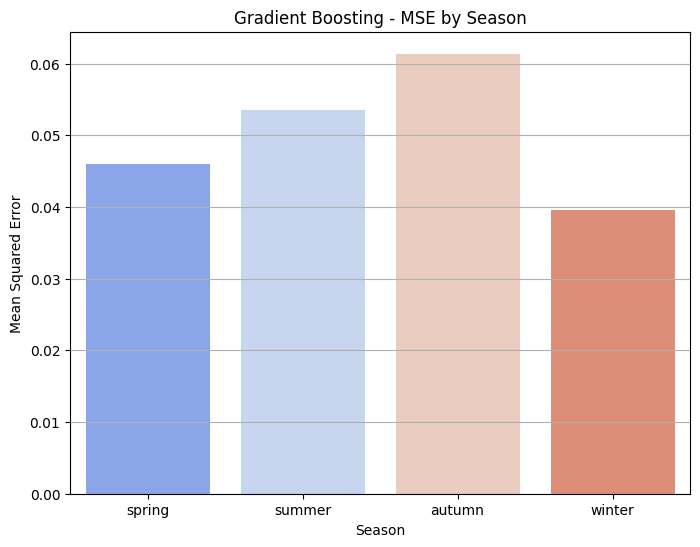

<ipython-input-31-ce56c766b4fb>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasons, y=r2_scores, palette='coolwarm')


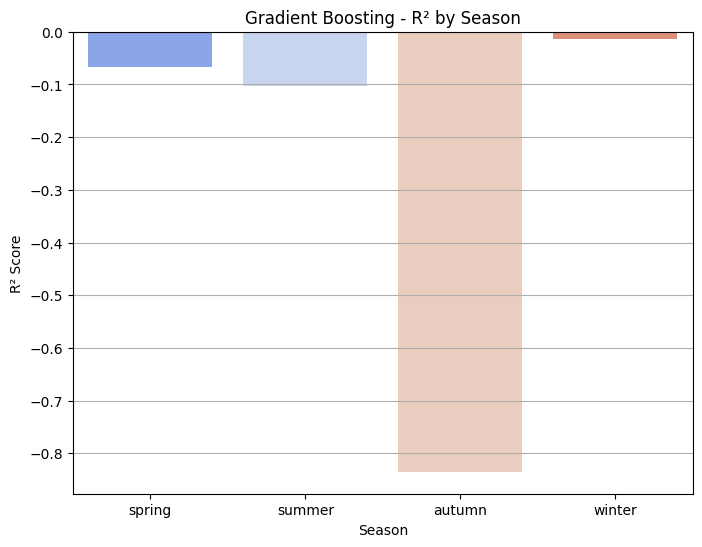

In [ ]:
# 성능 데이터 준비
mse_scores = [result['mse'] for result in gbr_results.values()]
r2_scores = [result['r2'] for result in gbr_results.values()]
seasons = list(gbr_results.keys())

# MSE 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=seasons, y=mse_scores, palette='coolwarm')
plt.title("Gradient Boosting - MSE by Season")
plt.xlabel("Season")
plt.ylabel("Mean Squared Error")
plt.grid(axis='y')
plt.show()

# R² 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=seasons, y=r2_scores, palette='coolwarm')
plt.title("Gradient Boosting - R² by Season")
plt.xlabel("Season")
plt.ylabel("R² Score")
plt.grid(axis='y')
plt.show()
